In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def visualize_mel_spectrogram(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    print(len(y))
    
    # Compute the Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    
    # Convert to log scale (dB)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    # Create a figure and remove axes, text, and borders
    fig, ax = plt.subplots(figsize=(12, 4))
    img = librosa.display.specshow(S_dB, sr=sr, x_axis=None, y_axis=None, ax=ax, cmap='magma')
    
    ax.axis('off')  # Turn off axis
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Remove padding and borders
    
    # Save the plot as an image file
    plt.savefig('mel_spectrogram_visualization.png', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

65280


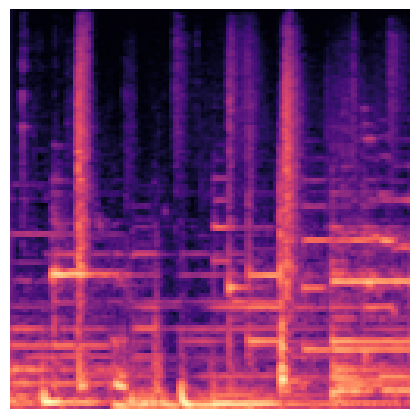

In [37]:
# Example usage
visualize_mel_spectrogram('../testing/ssd_256_256_single.wav')